Gambar sudah ada.
Gambar berhasil dimuat.


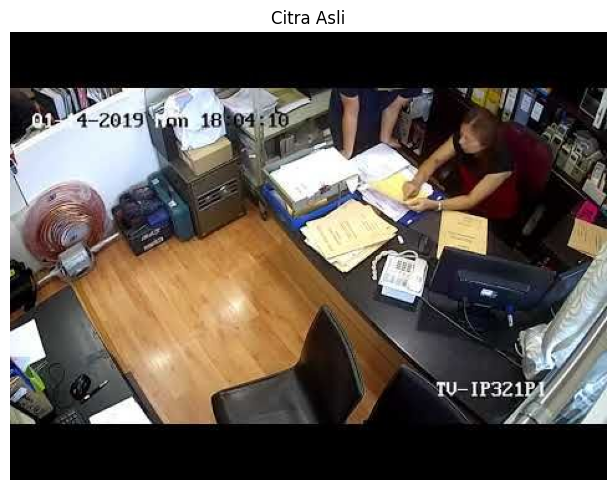

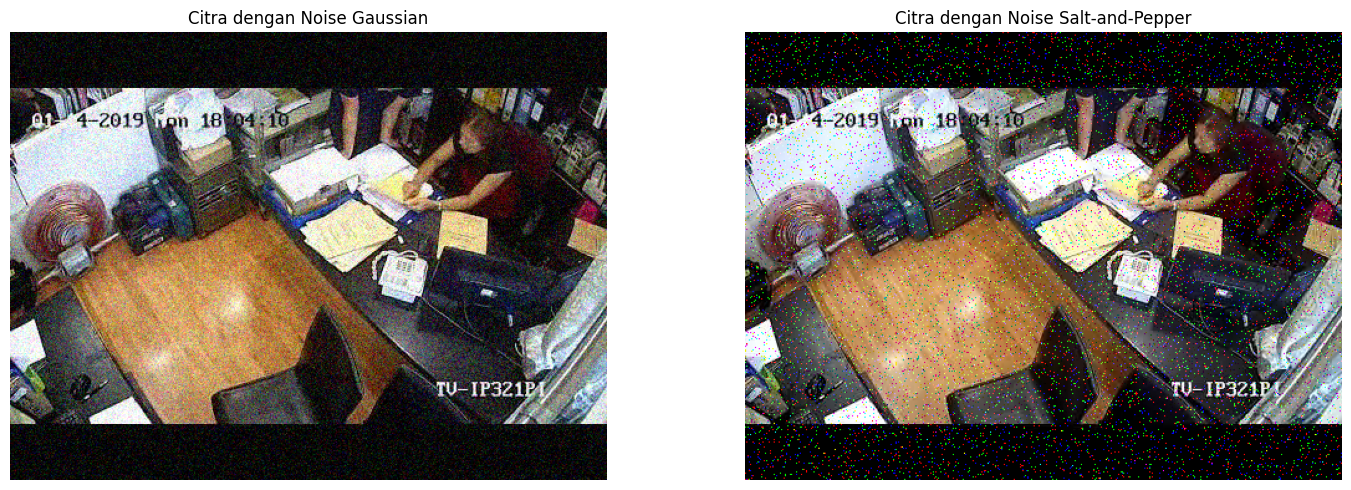

Citra dengan noise siap untuk diproses.


In [1]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.util import random_noise

# Membuat direktori untuk menyimpan gambar jika belum ada
if not os.path.exists('images'):
    os.makedirs('images')

# Mengunduh citra contoh (jika tidak ada file di Kaggle)
# Ini adalah URL contoh, Anda bisa ganti dengan URL gambar lain
# atau gunakan gambar yang sudah ada di dataset Kaggle Anda
import urllib.request
url = 'https://i.stack.imgur.com/uR2iR.png' # Contoh gambar
filename = '/kaggle/input/cuplikan-cctv/IP CCTV Camera (Day Vision )-Revlight Security.jpg'

if not os.path.exists(filename):
    print(f"Mengunduh gambar dari {url}...")
    urllib.request.urlretrieve(url, filename)
    print("Pengunduhan selesai.")
else:
    print("Gambar sudah ada.")

# Membaca citra
try:
    img = cv2.imread(filename)
    if img is None:
        raise FileNotFoundError(f"Tidak dapat membaca gambar dari {filename}. Pastikan path benar atau coba gambar lain.")
    
    # Konversi ke RGB karena OpenCV membaca dalam BGR secara default
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("Gambar berhasil dimuat.")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat gambar: {e}")
    # Jika gagal, kita bisa membuat gambar dummy
    img_rgb = np.zeros((200, 300, 3), dtype=np.uint8) + 128 # Gambar abu-abu
    print("Menggunakan gambar dummy karena gagal memuat.")


# Fungsi untuk menampilkan citra
def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Menampilkan citra asli
display_images([img_rgb], ["Citra Asli"])

# Simulasi menambahkan noise pada citra
# Kita akan tambahkan noise Gaussian dan Salt-and-Pepper
# Pertama, ubah citra ke float untuk random_noise
img_float = img_rgb / 255.0

# Tambahkan noise Gaussian
img_gaussian_noise = random_noise(img_float, mode='gaussian', var=0.01)
img_gaussian_noise = np.clip(img_gaussian_noise * 255, 0, 255).astype(np.uint8)

# Tambahkan noise Salt-and-Pepper
img_sp_noise = random_noise(img_float, mode='s&p', amount=0.05)
img_sp_noise = np.clip(img_sp_noise * 255, 0, 255).astype(np.uint8)

display_images([img_gaussian_noise, img_sp_noise], ["Citra dengan Noise Gaussian", "Citra dengan Noise Salt-and-Pepper"])

# Kita akan fokus pada citra dengan noise Gaussian untuk demonstrasi selanjutnya
# Anda bisa memilih img_sp_noise jika ingin mencoba noise salt-and-pepper
img_noisy = img_gaussian_noise
print("Citra dengan noise siap untuk diproses.")

Smoothing (Penghalusan) dan Noise Reduction (Peredaman Noise) adalah teknik penting dalam pengolahan citra digital untuk membersihkan gambar dari gangguan visual (noise). Noise sering muncul pada citra CCTV akibat kondisi lingkungan atau keterbatasan kamera.

Tugas ini menggunakan tiga filter sederhana:
* Filter Rata-rata (Mean Filter): Mengganti setiap piksel dengan rata-rata piksel di sekitarnya. Baik untuk noise acak (Gaussian), tapi bisa memburamkan citra.
* Filter Median (Median Filter): Mengganti setiap piksel dengan nilai median (nilai tengah) piksel di sekitarnya. Sangat efektif untuk noise "salt-and-pepper" karena tidak terpengaruh outlier, dan lebih baik menjaga tepi citra.
* Gaussian Blur: Menggunakan rata-rata tertimbang (piksel di tengah kernel diberi bobot lebih). Menghasilkan efek halus yang alami, sangat cocok untuk noise Gaussian.


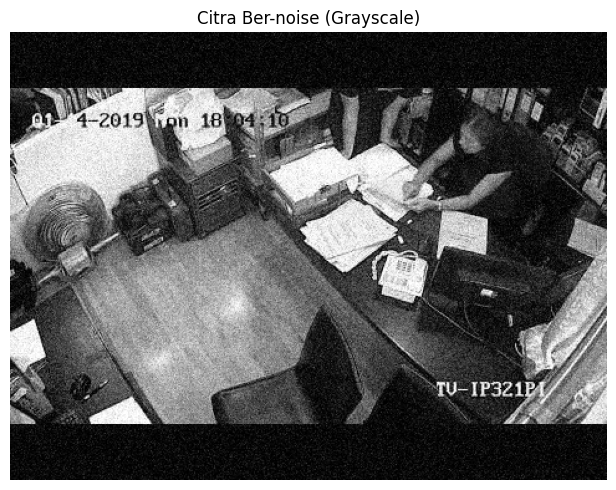

Menerapkan filter smoothing...
Filter Rata-rata diterapkan dengan kernel (5, 5).
Filter Median diterapkan dengan kernel 5.
Gaussian Blur diterapkan dengan kernel (5, 5) dan sigma 0.

Proses filtering selesai.


In [2]:
# Konversi citra ke grayscale jika noise reduction akan dilakukan pada channel tunggal
# Banyak filter noise reduction bekerja lebih optimal pada citra grayscale
img_gray_noisy = cv2.cvtColor(img_noisy, cv2.COLOR_RGB2GRAY)
display_images([img_gray_noisy], ["Citra Ber-noise (Grayscale)"])

print("Menerapkan filter smoothing...")

# 2.1. Filter Rata-rata (Mean Filter)
# cv2.blur(src, ksize)
# ksize adalah ukuran kernel (jendela)
kernel_size_mean = (5, 5) # Coba ukuran kernel yang berbeda (misal 3x3, 7x7)
mean_filtered_img = cv2.blur(img_gray_noisy, kernel_size_mean)
print(f"Filter Rata-rata diterapkan dengan kernel {kernel_size_mean}.")

# 2.2. Filter Median (Median Filter)
# cv2.medianBlur(src, ksize)
# ksize harus ganjil
kernel_size_median = 5 # Coba ukuran kernel yang berbeda (misal 3, 7)
median_filtered_img = cv2.medianBlur(img_gray_noisy, kernel_size_median)
print(f"Filter Median diterapkan dengan kernel {kernel_size_median}.")

# 2.3. Gaussian Blur
# cv2.GaussianBlur(src, ksize, sigmaX)
# ksize adalah ukuran kernel (harus ganjil), sigmaX adalah standar deviasi di sumbu X
kernel_size_gaussian = (5, 5) # Coba ukuran kernel yang berbeda
sigma_gaussian = 0 # Jika 0, sigmaX akan dihitung dari ksize
gaussian_filtered_img = cv2.GaussianBlur(img_gray_noisy, kernel_size_gaussian, sigma_gaussian)
print(f"Gaussian Blur diterapkan dengan kernel {kernel_size_gaussian} dan sigma {sigma_gaussian}.")

print("\nProses filtering selesai.")

Menampilkan perbandingan citra...


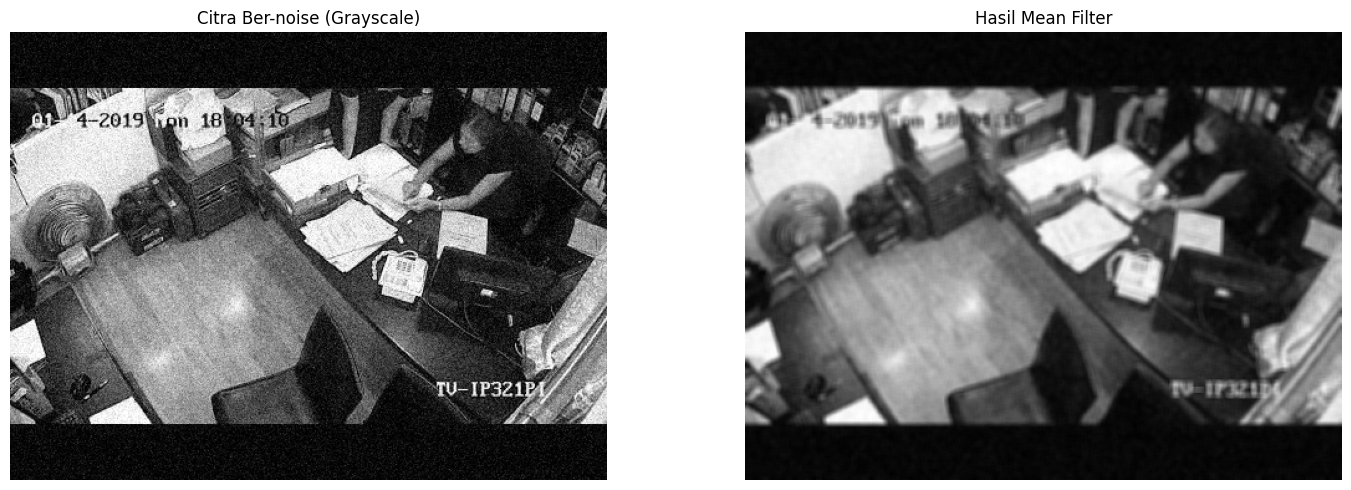

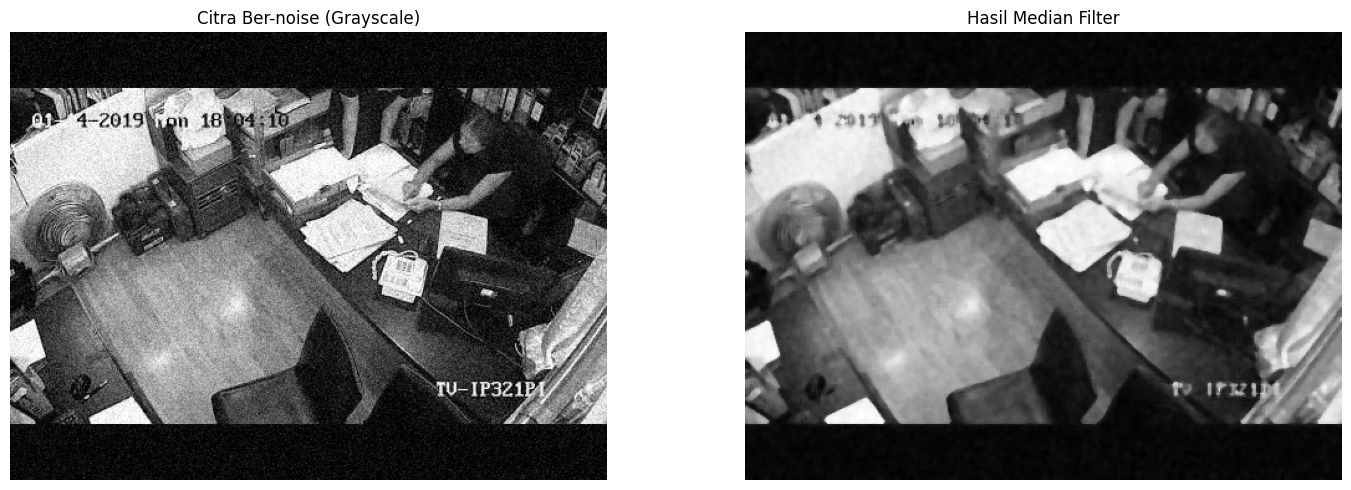

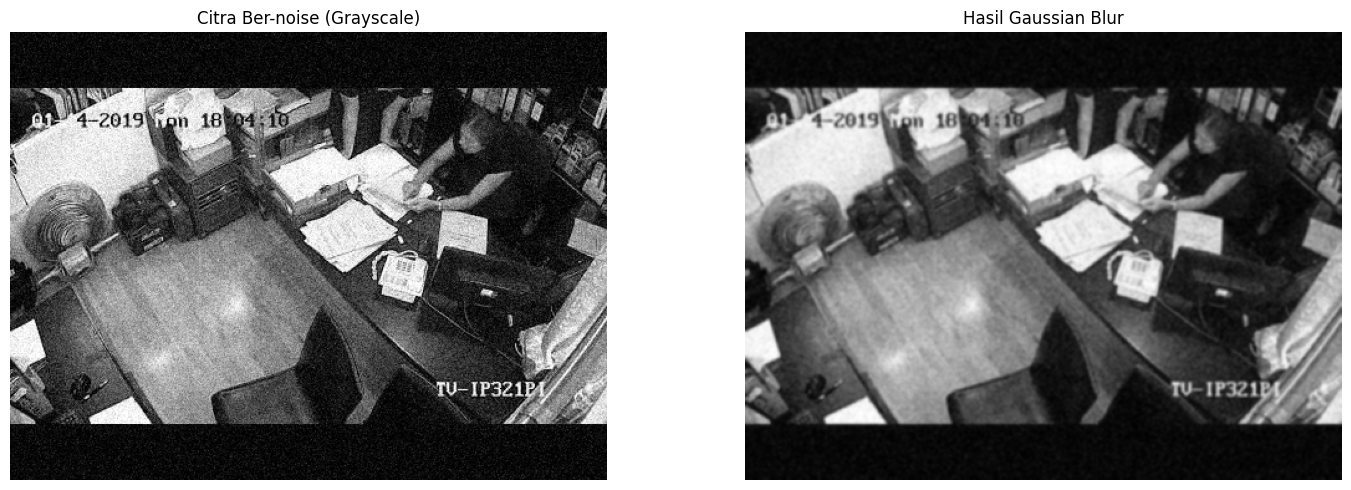

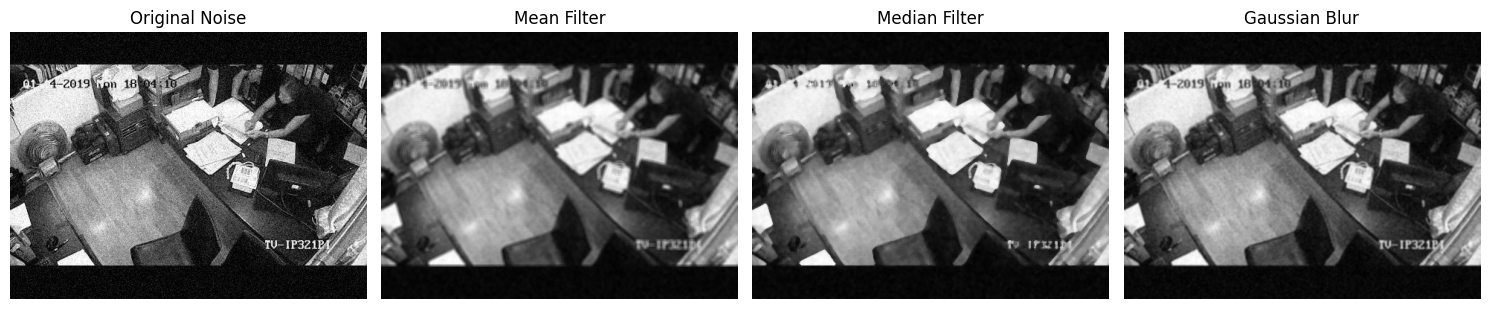


Perbandingan citra selesai. Silakan amati perbedaannya.


In [3]:
print("Menampilkan perbandingan citra...")

# Tampilkan citra sebelum dan sesudah filtering untuk setiap metode
display_images(
    [img_gray_noisy, mean_filtered_img],
    ["Citra Ber-noise (Grayscale)", "Hasil Mean Filter"]
)

display_images(
    [img_gray_noisy, median_filtered_img],
    ["Citra Ber-noise (Grayscale)", "Hasil Median Filter"]
)

display_images(
    [img_gray_noisy, gaussian_filtered_img],
    ["Citra Ber-noise (Grayscale)", "Hasil Gaussian Blur"]
)

# Tampilkan semua hasil filter secara berdampingan untuk perbandingan lebih lanjut
display_images(
    [img_gray_noisy, mean_filtered_img, median_filtered_img, gaussian_filtered_img],
    ["Original Noise", "Mean Filter", "Median Filter", "Gaussian Blur"]
)

print("\nPerbandingan citra selesai. Silakan amati perbedaannya.")

**Hasil Eksperimen**

Pada eksperimen ini, kami menggunakan citra CCTV yang telah ditambahkan noise Gaussian secara simulasi. Kami kemudian menerapkan ketiga filter di atas dan membandingkan hasilnya dengan citra ber-noise aslinya.

Visualisasi Hasil:
* Citra Asli dengan Noise (Grayscale):
  Output: Menampilkan gambar CCTV Anda dalam skala abu-abu yang jelas terlihat berbintik-bintik akibat noise Gaussian. Ini adalah kondisi awal citra yang akan diperbaiki.
* Hasil Mean Filter:
  Output: Citra terlihat lebih halus dan noise berkurang. Namun, detail dan tepi objek pada gambar cenderung menjadi buram atau kabur.
* Hasil Median Filter:
  Output: Noise Gaussian juga berkurang, dan tepi citra terlihat relatif lebih terjaga dibandingkan hasil Mean Filter. Meskipun efektif untuk noise salt-and-pepper, untuk noise Gaussian, hasilnya mungkin tidak sehalus Gaussian Blur.
* Hasil Gaussian Blur:
  Output: Citra menunjukkan peredaman noise yang sangat baik dan menghasilkan efek penghalusan yang paling alami. Detail masih cukup terlihat, dan pemburaman tepi tidak terlalu parah dibandingkan Mean Filter.
* Perbandingan Semua Filter:
  Output: Seluruh hasil filter (bersama citra asli ber-noise) ditampilkan berdampingan, memudahkan perbandingan langsung efektivitas dan dampak masing-masing filter terhadap kualitas citra.

Dari hasil eksperimen, dapat disimpulkan beberapa hal:
1. Efektivitas Peredaman Noise:
    * Untuk kasus citra dengan noise Gaussian yang kami simulasikan, Gaussian Blur terbukti paling efektif dalam meredam noise, menghasilkan citra yang paling bersih dan enak dilihat.
    * Mean Filter juga meredam noise, namun dengan efek buram yang signifikan.
    * Median Filter, meski umumnya unggul untuk noise salt-and-pepper, masih mampu meredam noise Gaussian namun tidak seoptimal Gaussian Blur.
3. Preservasi Detail dan Tepi Citra:
   * Mean Filter paling banyak menyebabkan kehilangan detail dan pemburaman tepi.
   * Median Filter cukup baik dalam menjaga ketajaman tepi karena metodenya tidak merata-ratakan nilai ekstrem.
   * Gaussian Blur memberikan kompromi yang baik, meredam noise tanpa terlalu mengorbankan detail kunci, menghasilkan blur yang lebih lembut dan natural.
5. Kelebihan dan Kekurangan Metode:
   * Mean Filter:
     Kelebihan: Sangat sederhana dan cepat.
     Kekurangan: Menyebabkan citra buram, tidak efektif untuk noise ekstrem (salt-and-pepper).
   * Median Filter:
     Kelebihan: Sangat efektif untuk noise salt-and-pepper, baik dalam menjaga tepi.
     Kekurangan: Bisa menghilangkan detail halus, sedikit lebih lambat dari Mean Filter.
   * Gaussian Blur:
     Kelebihan: Menghasilkan smoothing alami, sangat efektif untuk noise Gaussian, kontrol lebih baik dengan parameter sigma.
     Kekurangan: Tetap menyebabkan pemburaman detail, kurang optimal untuk noise salt-and-pepper.
